In [51]:
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt

import requests  
import pandas as pd 
import urllib.parse
import urllib.request


In [2]:
 
#website = 'https://www.ebay.com/sch/i.html?_from=R40&_nkw=laptops++&_sacat=177&_pgn=1'
 
#response = requests.get(website, 'html.parser') 
#response.status_code  

200

In [3]:
#response.status_code  

200

In [1]:
#soup = bs(response.content, 'html.parser')
#print(soup.prettify())

In [5]:
data  = soup.find_all('li', {'class':'s-item--watch-at-corner'})
len(data)

70

In [2]:
#print(data[1].prettify())
#print(data[0].prettify())

In [7]:
desc = data[0].select('div', {'class': 's-item__detail s-item__detail--primary'})
desc_all = [des.get_text() for des in desc][9:15]
desc_all


['$300.00',
 'or Best Offer',
 'Free International Shipping',
 'from United States',
 'Almost gone',
 '119 sold']

In [8]:
#Link 
#print(data[1].select('a'))
from urllib.parse import urlparse 
link1 = data[0].find('a').get('href')
link1

'https://www.ebay.com/itm/333278377870?hash=item4d98f0778e:g:Ch4AAOSwwkhgNcR~&amdata=enc%3AAQAHAAAA4N5fYXvUWoz1KEcqFPfvPRnQ9evAKH6%2ByUSvzE4SJD4Mub%2BoPiYEtYRJsNBcV7uaJPbJOPkYzSOYFpfPdRPEDqwyVfe%2F09tm44xlgTO214QxX6WES%2F1GKC7GhbHopiUf3wIS2zUmOjdEURuUJgGIwdWi3wsmCyGguOAupP9h615oB2tqHaVAf30YNnjoEzCnzihiCTCdCU3m6%2Bnn%2BGa4CicHc6s2YRnRdfGaWwCVSSBcinSatKMLirYGwS709bHfS6sF8auuRlbcFrHxbXViBKtdLIvnoHBR3TKE0hi2mjxV%7Ctkp%3ABFBMiNDuop5h'

In [9]:
#Country 
desc_country = data[0].select('div', {'class': 's-item__detail s-item__detail--primary'})
desc_all = [des.get_text() for des in desc][12]
desc_all

#Or  

state = data[0].find_all('span', {'class':'s-item__location s-item__itemLocation'}) 
state2 = [st.get_text() for st in state]
state2

['from United States']

In [10]:
data_text = data[0].select('div.s-item__title') 
data_text2 = [dat.get_text() for dat in data_text][0]
data_text2


'CHUWI GemiBook Pro 14" Laptop Wins11 Intel N5100 PC 8+256G SSD Backlit Notebook'

In [11]:
data[0].find('span', {'class':'s-item__price'}).get_text()

'$300.00'

In [12]:
#Review 
data[0].find('span', {'class': 'SECONDARY_INFO'}).get_text()

'Brand New'

In [13]:
#Rate  
data[0].find('span', {'class': 's-item__detail--secondary'})

<span class="s-item__detail s-item__detail--secondary"><span class="s-item__etrs"><span class="s-item__etrs-badge s-item__etrs-badge-seller"><span class="clipped">Top Rated Seller</span></span><svg aria-hidden="true" class="s-item__etrs-badge-svg" fill="#fff" height="20" width="15"><use xlink:href="#svg-icon-etrs-badge"></use></svg><span class="s-item__etrs-text">Top Rated Seller</span></span></span>

In [14]:
#This not works in loop with class problems  lets try another way 
data[0].find('span', {'class': 's-item__detail--secondary'}).get_text().strip().replace('Top ', ' TOP ')

#This one is better 
data[0].select('span')[6].get_text()


'Top Rated SellerTop Rated Seller'

In [15]:
#print(soup.body.div.table.tbody.tr.tr.option.prettify())

In [16]:
#text name of a href  
data[0].find('a', {'class': 's-item__link'}).get_text()

'CHUWI GemiBook Pro 14" Laptop Wins11 Intel N5100 PC 8+256G SSD Backlit NotebookOpens in a new window or tab'

In [17]:
#data[0].find('span', {'class': 's-item__quantitySold'}).get_text()

In [42]:
state = data_of_all.find_all('span', {'class':'s-item__location s-item__itemLocation'}) 
state2 = [st.get_text() for st in state]
state2

['from Italy']

In [ ]:
data

In [19]:
#lets collect everything  

items_name = []
items_price = []
rate = []
country = []
quantity = []

#count_list = data_of_all.select('div', {'class': 's-item__detail s-item__detail--primary'}) 
##countries = [des.get_text() for des in count_list][14]

 
try:

    for data_of_all in data:



        items_name.append(data_of_all.find('a', {'class': 's-item__link'}).get_text())
        items_price.append(data_of_all.find('span', {'class':'s-item__price'}).get_text())
        rate.append(data_of_all.select('span')[6].get_text())
        country.append(data_of_all.find('span', {'class':'s-item__location s-item__itemLocation'}).get_text())
        quantity.append(data_of_all.find('span', {'class':'s-item__dynamic s-item__quantitySold'}))


except: 
    items_name.append('No product')
    items_price.append('No Price')
    rate.append('No Rate')
    country.append('No Country')
    
 
 
 

In [20]:
quantity = ['No order' if x is None else x.get_text() for x in quantity]
quantity

['119 sold',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 '260 sold',
 '437 sold',
 'No order',
 '423 sold',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 '1,685 sold',
 'No order',
 'No order',
 'No order',
 'No order',
 '382 sold',
 'No order',
 '63 sold',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 '223 sold',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 '22 sold',
 'No order',
 'No order',
 'No order',
 '36 sold',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 '53 sold',
 'No order',
 'No order']

In [21]:
items_name
len(items_price)

70

In [22]:
len(data)

70

In [23]:
all_data = pd.DataFrame({'Name': items_name, 'Price':items_price, 'Rate': rate, 'Country':country, 'Quantity':quantity})
all_data.head(100)

,Name,Price,Rate,Country,Quantity
0,"CHUWI GemiBook Pro 14"" Laptop Wins11 Intel N51...",$300.00,Top Rated SellerTop Rated Seller,from United States,119 sold
1,CHUWI HeroBook Pro 14.1 in Laptop Windows 11 I...,$219.99,Take $10 off your order with coupon,from United States,No order
2,"New ListingASUS VivoBook F512J 15.6"" Intel Cor...",$249.00,$249.00,from United States,No order
3,New ListingLenovo Notebook G50-70 to Hobbyists...,$1.05,0 bids ·,from Germany,No order
4,"Dell XPS 13 9360 13.3"" 2K UHD Ultrabook - Inte...",$257.16,from Canada,from Canada,No order
...,...,...,...,...,...
65,New ListingIBM Thinkpad T40 2373 Boots Up For ...,$50.00,$50.00,from United States,No order
66,"New Listing*AS NEW* Dell 15.6"" Laptop, Ryzen 5...",$301.93,Buy It Now,from Australia,No order
67,Dell Latitude 3189 Windows 11 Laptop 2-in-1 ta...,$86.64,Buy It Now,from United States,53 sold
68,New ListingDell Inspiron 1546 Laptop for parts...,$16.90,·,from Canada,No order


In [24]:
##url_comb = []
##for link in link1:
 #   url_comb.append(link1)
#url_comb

In [25]:
#Lets paginate 4 pages  
 #lets collect everything  

name = []
price = []
rate = []
country = []
quantity = []

for i in range(1,5):
    url = 'https://www.ebay.com/sch/i.html?_from=R40&_nkw=laptops++&_sacat=177&_pgn='
    #print(int(i))
    website = url + str(i)
    
    response = requests.get(website, 'html.parser') 
   # print(website)
    soup = bs(response.content, 'html.parser')
  # print(soup.prettify())
    
   
    data = soup.find_all('li', {'class':'s-item--watch-at-corner'})
    #print(len(data))
    
    #possible to define func
    
    try:

        for data_of_all in data:

            name.append(data_of_all.find('a', {'class': 's-item__link'}).get_text())
            price.append(data_of_all.find('span', {'class':'s-item__price'}).get_text())
            rate.append(data_of_all.select('span')[6].get_text())
            country.append(data_of_all.find('span', {'class':'s-item__location s-item__itemLocation'}).get_text())
            quantity.append(data_of_all.find('span', {'class':'s-item__dynamic s-item__quantitySold'}))
           
    except: 
            items_name.append('No product')
            items_price.append('No Price')
            rate.append('No Rate')
            country.append('No Country')
            
    

In [26]:
quantity2 = ['No order' if x is None else x.get_text() for x in quantity]
quantity2

['119 sold',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 '260 sold',
 '437 sold',
 'No order',
 '423 sold',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 '1,685 sold',
 'No order',
 'No order',
 'No order',
 'No order',
 '382 sold',
 'No order',
 '63 sold',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 '223 sold',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 '22 sold',
 'No order',
 'No order',
 'No order',
 '36 sold',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',
 'No order',


In [27]:
all4_data = pd.DataFrame({'Name': name, 'Price':price, 'Rate': rate, 'Country':country, 'Quantity':quantity2})


#all4_data.to_csv('a.csv')


In [28]:
import re 
all4_data.head(100)


#dealing with dollar
#)  #No use 
#trends['Price'].value_counts()
#trends[trends['Price'].str.contains(",") == True] 

all4_data['Price'] = all4_data['Price'].replace('[^\d.]', '', regex = True).astype(float)


In [29]:
 
all4_data['Name'] = all4_data['Name'].apply(lambda x: x[:30]+ str('..'))

In [30]:
 
df4 = all4_data.sort_values(by=['Price'],ascending=False)
df4

,Name,Price,Rate,Country,Quantity
179,New ListingLenovo ThinkPad x1 ..,4772.06,Free International Shipping,from Italy,No order
200,Razer Blade 17 i9-12900H Noteb..,4699.75,+$57.16 shipping,from Australia,No order
169,New ListingFujitsu CELSIUS H75..,4629.73,Free International Shipping,from Italy,No order
203,MSI GS75 Stealth-1074 17.3 144..,3658.34,+$60.96 shipping,from United Kingdom,No order
164,New ListingApple MacBook Air M..,3491.57,Free International Shipping,from Italy,No order
...,...,...,...,...,...
120,ASUS a56 k56 v550 s550 s56 WiF..,10.18,from Italy,from Italy,No order
51,Windows7 Ultimate install Disk..,8.52,from United Kingdom,from United Kingdom,22 sold
8,New ListingASUS UL50V 17-Inch ..,1.05,1 bid ·,from Germany,No order
16,New ListingLenovo E31 Notebook..,1.05,0 bids ·,from Germany,No order


In [31]:
#Let's visualise some of them
df4.dtypes

Name         object
Price       float64
Rate         object
Country      object
Quantity     object
dtype: object

In [32]:
df4['Rate'].value_counts()

Free International Shipping            36
Top Rated SellerTop Rated Seller       35
Top Rated Seller                       17
Buy It Now                             13
0 bids ·                               12
                                       ..
$220.00                                 1
Take $10 off your order with coupon     1
+$16.86 shipping                        1
+$50.41 shipping                        1
from United Kingdom                     1
Name: Rate, Length: 65, dtype: int64

In [33]:
df4['Rate'].value_counts()

Free International Shipping            36
Top Rated SellerTop Rated Seller       35
Top Rated Seller                       17
Buy It Now                             13
0 bids ·                               12
                                       ..
$220.00                                 1
Take $10 off your order with coupon     1
+$16.86 shipping                        1
+$50.41 shipping                        1
from United Kingdom                     1
Name: Rate, Length: 65, dtype: int64

In [34]:
df4['Rate'] = df4['Rate'].replace('Top Rated SellerTop Rated Seller','Top Rated Seller')


In [35]:
df4[df4['Rate'] == 'Top Rated SellerTop Rated Seller']

,Name,Price,Rate,Country,Quantity


In [36]:
df4['Rate'].value_counts()
#pd.set_option("display.max_rows", None)
#df4['Rate'].value_counts() 

Top Rated Seller                       52
Free International Shipping            36
Buy It Now                             13
0 bids ·                               12
 ·                                     10
                                       ..
+$57.16 shipping                        1
Take $10 off your order with coupon     1
+$16.86 shipping                        1
+$50.41 shipping                        1
from United Kingdom                     1
Name: Rate, Length: 64, dtype: int64

In [110]:
df4.head(20)

,Name,Price,Rate,Country,Quantity
179,New ListingLenovo ThinkPad x1 ..,4772.06,Free International Shipping,from Italy,No order
200,Razer Blade 17 i9-12900H Noteb..,4699.75,+$57.16 shipping,from Australia,No order
169,New ListingFujitsu CELSIUS H75..,4629.73,Free International Shipping,from Italy,No order
203,MSI GS75 Stealth-1074 17.3 144..,3658.34,+$60.96 shipping,from United Kingdom,No order
164,New ListingApple MacBook Air M..,3491.57,Free International Shipping,from Italy,No order
207,"Notebook Rugged 14"" Core i7 16..",3341.46,Top Rated Seller,from Italy,No order
178,New ListingLenovo ThinkPad x1 ..,3275.31,Free International Shipping,from Italy,No order
170,New ListingLenovo ThinkPad P14..,3249.99,Free International Shipping,from Italy,No order
140,"Notebook Rugged 14 "" Core i7 1..",3238.40,Top Rated Seller,from Italy,No order
158,"Notebook Rugged 14 "" Core i7 1..",3238.40,Top Rated Seller,from Italy,No order


In [111]:
top_prices = df4[['Name','Price']].sort_values(by=['Price'], ascending=False)
top_prices.head(7)

,Name,Price
179,New ListingLenovo ThinkPad x1 ..,4772.06
200,Razer Blade 17 i9-12900H Noteb..,4699.75
169,New ListingFujitsu CELSIUS H75..,4629.73
203,MSI GS75 Stealth-1074 17.3 144..,3658.34
164,New ListingApple MacBook Air M..,3491.57
207,"Notebook Rugged 14"" Core i7 16..",3341.46
178,New ListingLenovo ThinkPad x1 ..,3275.31


In [284]:
top_rated_laptops = df4[df4.Rate == 'Top Rated Seller'].Name.value_counts().head(6)
top_rated_laptops

Notebook Rugged 14 " Core i7 8..    3
New ListingHP Pavilion 15-P008..    2
Notebook Rugged 14 " Core i7 1..    2
New ListingDell Precision 5540..    2
New ListingDell XPS 15 9560 i7..    2
New ListingHP 15-BA052AU Lapto..    1
Name: Name, dtype: int64

In [286]:
top_rated_laptops

Notebook Rugged 14 " Core i7 8..    3
New ListingHP Pavilion 15-P008..    2
Notebook Rugged 14 " Core i7 1..    2
New ListingDell Precision 5540..    2
New ListingDell XPS 15 9560 i7..    2
New ListingHP 15-BA052AU Lapto..    1
Name: Name, dtype: int64

In [290]:
for i in  top_rated_laptops:
    print (i)

3
2
2
2
2
1


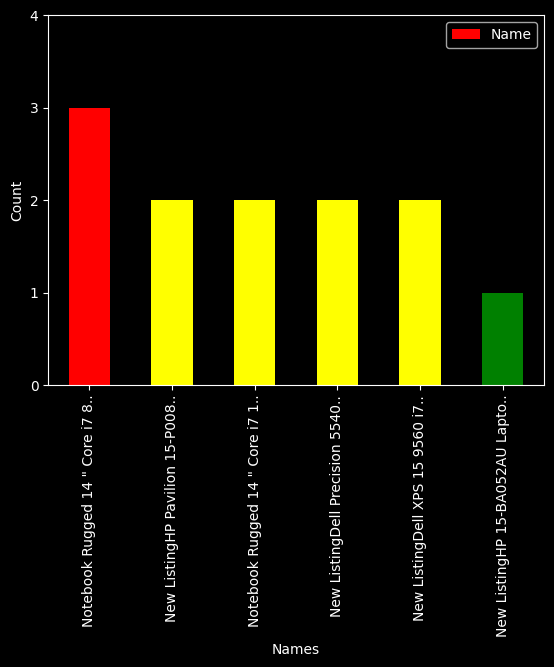

In [316]:
#colors = ['red' if i >=3  else 'yellow' for i in top_rated_laptops] 

#Lets append as we should use elif  

col = [] 
for i in top_rated_laptops:
    if i >=3:
        col.append('red')
    elif i==2:
        col.append('yellow')
    else:
        col.append('green')


top_rated_laptops.plot(kind = 'bar', color = col) 
plt.yticks([0,1,2,3,4])
#plt.style.use('dark_background')
plt.legend()
plt.xlabel('Names')
plt.ylabel('Count') 
plt.show()


#sns.countplot(top_rated_laptops)

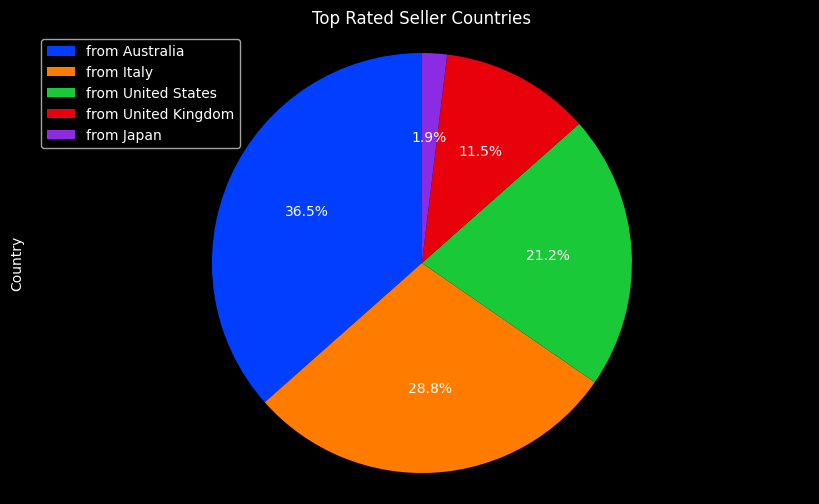

In [173]:
import seaborn as sns   
top_rated_country= df4[df4.Rate == 'Top Rated Seller'].Country.value_counts().head()
top_rated_country

colors = sns.color_palette("bright") 
labels = top_rated_country.index
#create pie chart
top_rated_country.plot(kind="pie", colors = colors, labels = None, startangle = 90,  autopct='%.1f%%',  figsize = (10,6))
plt.title('Top Rated Seller Countries')
plt.legend(labels,  loc="upper left",  bbox_transform=fig.transFigure) 
plt.axis('equal') 

plt.show()

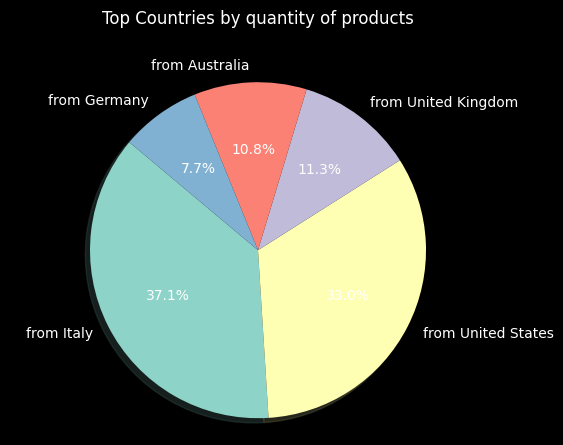

In [175]:
top_countries_by_sells = df4['Country'].value_counts().head()
top_countries_by_sells

labels =  top_countries_by_sells.index
 
# Plot
plt.pie(top_countries_by_sells, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Top Countries by quantity of products', y =1.09)
plt.show()

In [116]:
df4.Quantity.sort_values(ascending= True)

22     1,685 sold
0        119 sold
100      142 sold
51        22 sold
36       223 sold
          ...    
188      No order
186      No order
40       No order
157      No order
3        No order
Name: Quantity, Length: 212, dtype: object

In [353]:
Numb_of_orders = df4[df4['Quantity'].str.contains('No order') != True].Country.value_counts()
Numb_of_orders

from United States     6
from Italy             3
from Australia         2
from United Kingdom    2
from France            1
Name: Country, dtype: int64

In [394]:
country_by_expensiveness = df4.groupby('Country').sum().sort_values(by=['Price'], ascending=False).head(6)
country_by_expensiveness


,Price
Country,
from Italy,126582.92
from United States,20362.64
from United Kingdom,10934.30
from Australia,10280.41
from Germany,2549.10
from France,1443.33


In [395]:
country_by_expensiveness


,Price
Country,
from Italy,126582.92
from United States,20362.64
from United Kingdom,10934.30
from Australia,10280.41
from Germany,2549.10
from France,1443.33


In [397]:
country_by_expensiveness.reset_index(inplace = True)
country_by_expensiveness

,Country,Price
0,from Italy,126582.92
1,from United States,20362.64
2,from United Kingdom,10934.30
3,from Australia,10280.41
4,from Germany,2549.10
5,from France,1443.33


In [400]:
country_by_expensiveness['Country'] = country_by_expensiveness['Country'].apply(lambda x: x[4:]) 

In [460]:
country_by_expensiveness.set_index('Country', inplace = True)
country_by_expensiveness

,Price
Country,
Italy,126582.92
United States,20362.64
United Kingdom,10934.30
Australia,10280.41
Germany,2549.10
France,1443.33


In [461]:
country_by_expensiveness.index

Index([' Italy', ' United States', ' United Kingdom', ' Australia', ' Germany',
       ' France'],
      dtype='object', name='Country')

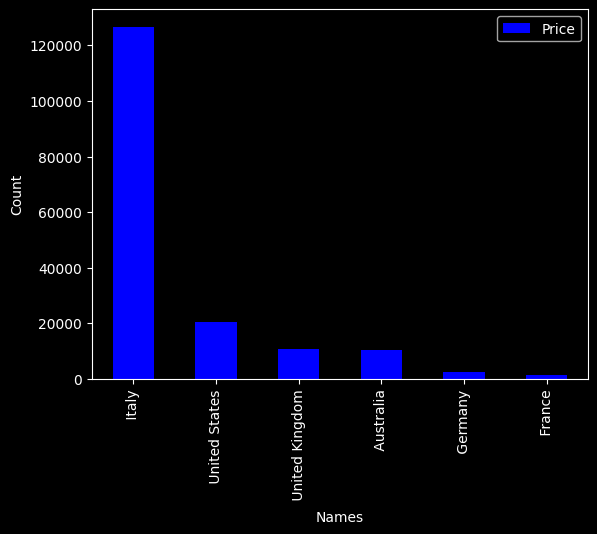

In [458]:

labels = country_by_expensiveness.index
country_by_expensiveness.plot(kind = 'bar', color = 'b', label = labels) 
#plt.yticks(coun)
#plt.style.use('dark_background')
plt.legend(loc="upper right") 
plt.xlabel('Names')
plt.ylabel('Count') 
plt.show()